In [31]:
import pickle
import pandas as pd
import os
import seaborn

# Load the pickle file
with open("../scenario-properties-baseline-SEP2.pkl", "rb") as f:
    scenario_properties = pickle.load(f)

# Quick check: What attributes are available?
print(dir(scenario_properties))

# Define base output path
simulation_name = "SEP2"
base_path = f"figures/{simulation_name}"
os.makedirs(base_path, exist_ok=True)

['Dhl', 'Dhu', 'FLM_steps', 'HMid', 'LC', 'R0', 'R0_km', 'R0_rad_km', 'SEP_mapping', 'V', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_collision_pairs', 'add_species_set', 'all_symbolic_vars', 'baseline', 'build_indicator_variables', 'build_model', 'build_model_elliptical', 'build_sym_model', 'calculate_scen_times_dates', 'coll_eqs_lambd', 'collision_pairs', 'cum_CSI', 'debris_length', 'debris_names', 'deltaH', 'density_model', 'drag_term_cur', 'drag_term_upper', 'end_date', 'equations', 'fragment_spreading', 'full_Cdot_PMD', 'full_coll', 'full_drag', 'full_lambda', 'full_lambda_flattened', 'future_launch_model', 'indicator_results', 'indicator_variables', 'indicator_variables_list', 'in

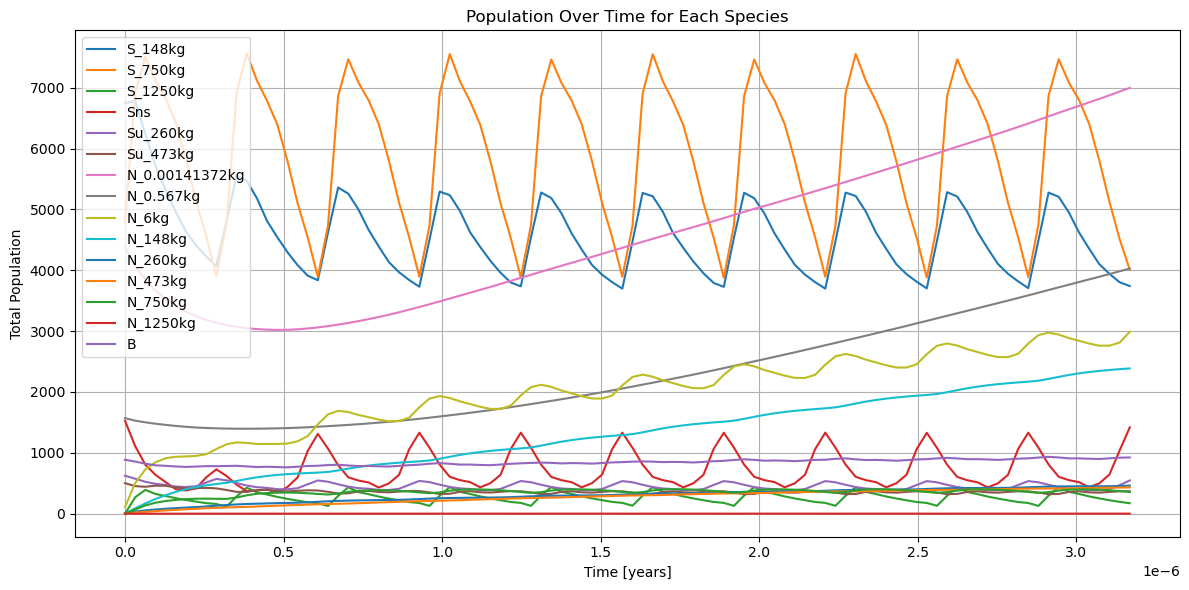

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Time array (in seconds) → convert to years for plot
times = scenario_properties.output.t / (365.25 * 24 * 3600)  # seconds to years

# Species and shell info
species = scenario_properties.species_names
n_shells = scenario_properties.n_shells
y = scenario_properties.output.y  # shape: [n_species * n_shells, n_times]

# Plot total population over time for each species
plt.figure(figsize=(12, 6))

for i, sp in enumerate(species):
    start = i * n_shells
    end = (i + 1) * n_shells
    pop_total = y[start:end, :].sum(axis=0)  # sum over shells

    plt.plot(times, pop_total, label=sp)

plt.xlabel("Time [years]")
plt.ylabel("Total Population")
plt.title("Population Over Time for Each Species")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

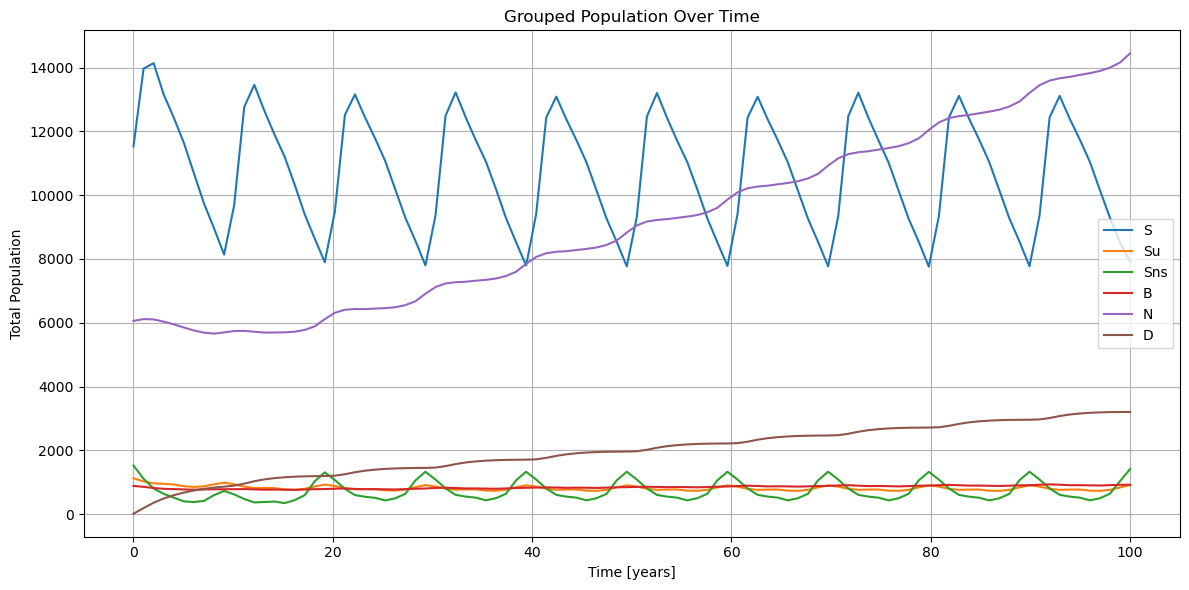

Saved population data to figures/SEP2/pop_time.csv


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Time array (seconds → years)
times = scenario_properties.scen_times
species = scenario_properties.species_names
n_shells = scenario_properties.n_shells
y = scenario_properties.output.y

# Define fragment mass species for D group
large_fragments = ['N_148kg', 'N_260kg', 'N_472kg', 'N_750kg', 'N_1250kg']

# Initialize grouped data
group_pop = {
    'S': np.zeros_like(times),
    'Su': np.zeros_like(times),
    'Sns': np.zeros_like(times),
    'B': np.zeros_like(times),
    'N': np.zeros_like(times),
    'D': np.zeros_like(times)
}

# Classify each species
for i, sp in enumerate(species):
    start = i * n_shells
    end = (i + 1) * n_shells
    pop_total = y[start:end, :].sum(axis=0)

    if sp.startswith('Sns'):
        group_pop['Sns'] += pop_total
    elif sp.startswith('Su'):
        group_pop['Su'] += pop_total
    elif sp.startswith('S'):
        group_pop['S'] += pop_total
    elif sp == 'B':
        group_pop['B'] += pop_total
    elif sp in large_fragments:
        group_pop['D'] += pop_total
    elif sp.startswith('N'):
        group_pop['N'] += pop_total
    # else: ignore

# Plotting
plt.figure(figsize=(12, 6))
for group, pop in group_pop.items():
    plt.plot(times, pop, label=group)

plt.xlabel("Time [years]")
plt.ylabel("Total Population")
plt.title("Grouped Population Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd

# Convert start_date to datetime if it's a string
start_year = pd.to_datetime(scenario_properties.start_date).year

# Build tidy DataFrame
rows = []
for species, pop_series in group_pop.items():
    for t_idx, pop in enumerate(pop_series):
        year = int(start_year + times[t_idx])
        rows.append({
            "Species": species,
            "Population": pop,
            "Year": year
        })

# Create DataFrame
df_grouped = pd.DataFrame(rows)

# Optional: sort by year and species
df_grouped = df_grouped.sort_values(["Species", "Year"]).reset_index(drop=True)

# Save grouped population DataFrame to CSV
csv_path = os.path.join(base_path, "pop_time.csv")
df_grouped.to_csv(csv_path, index=False)

print(f"Saved population data to {csv_path}")

Columns in df_grouped_alt: ['Species', 'Population', 'Year', 'Altitude']
  Species  Population  Year  Altitude
0       S         0.0  2025     215.0
1       S         0.0  2026     215.0
2       S         0.0  2027     215.0
3       S         0.0  2028     215.0
4       S         0.0  2029     215.0
Saved shell-resolved population data to figures/SEP2/pop_time_alt.csv


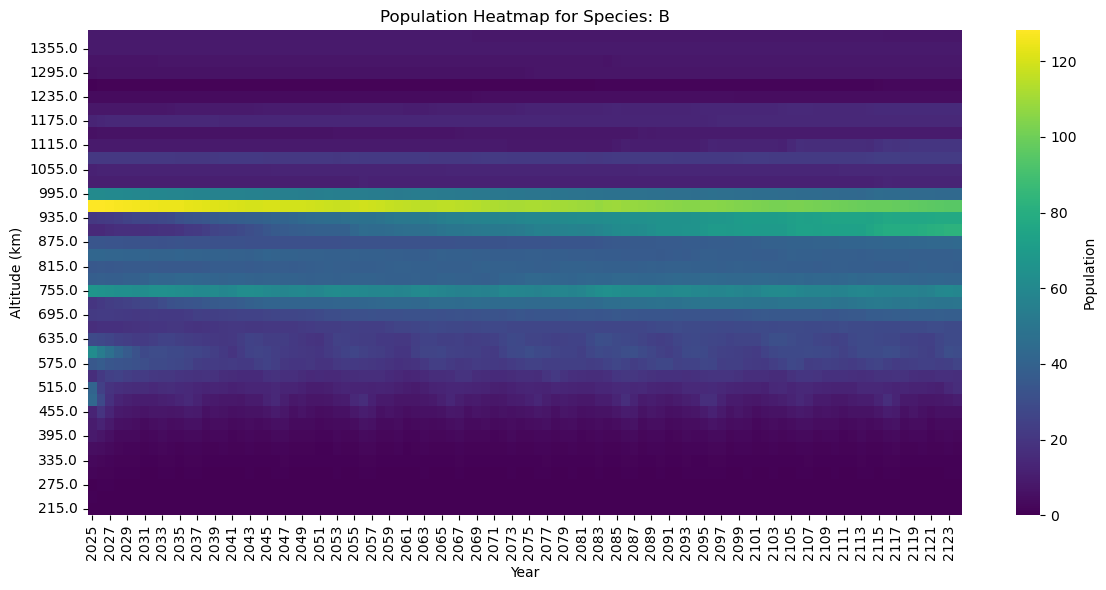

Saved heatmap for B to figures/SEP2/heatmaps/Su_heatmap.png


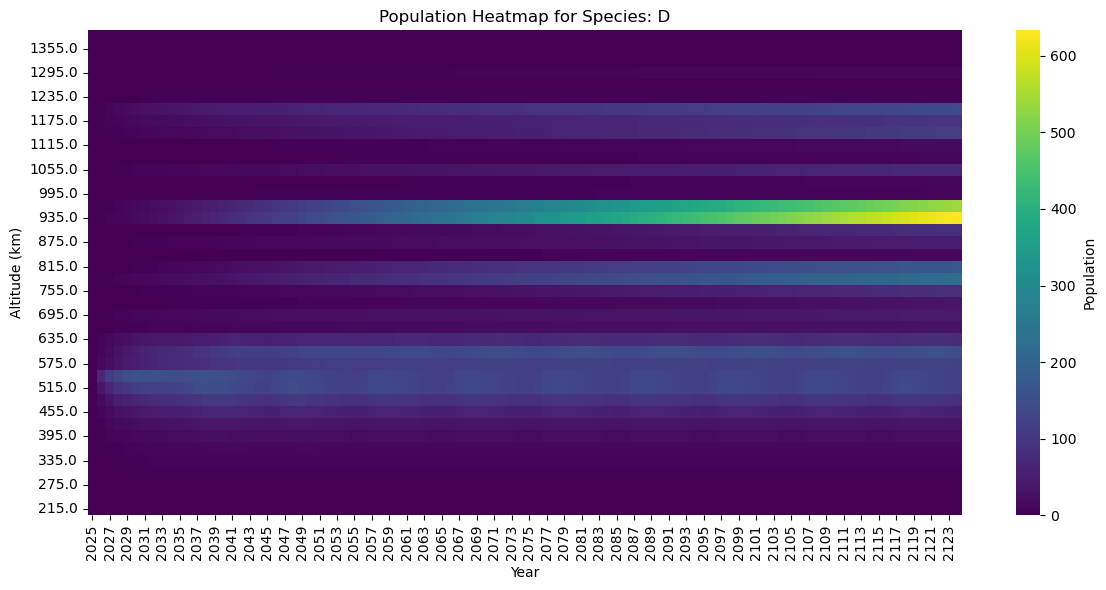

Saved heatmap for D to figures/SEP2/heatmaps/Su_heatmap.png


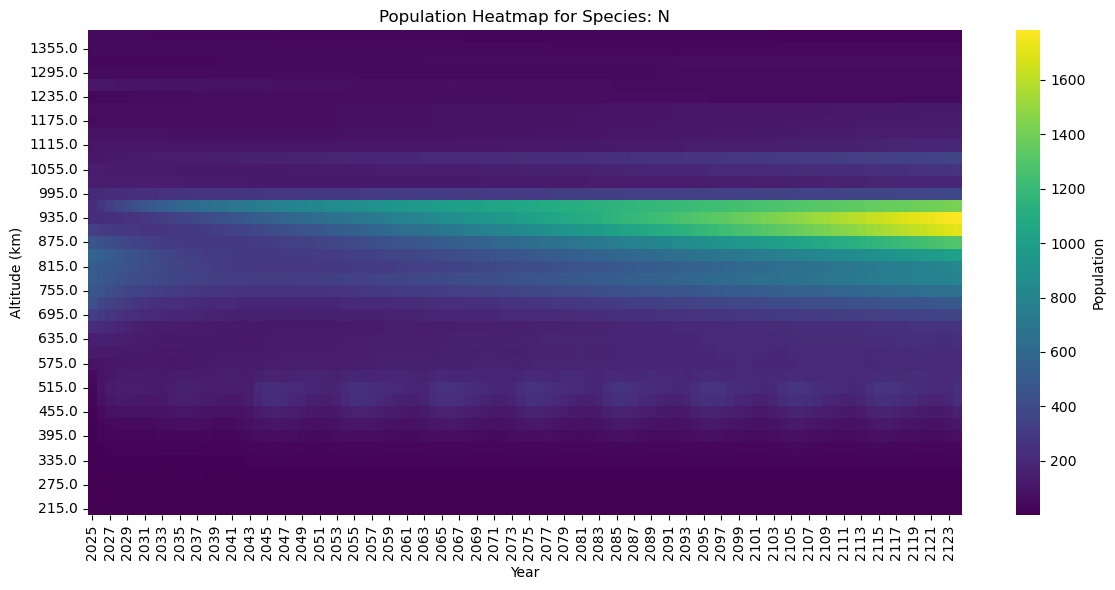

Saved heatmap for N to figures/SEP2/heatmaps/Su_heatmap.png


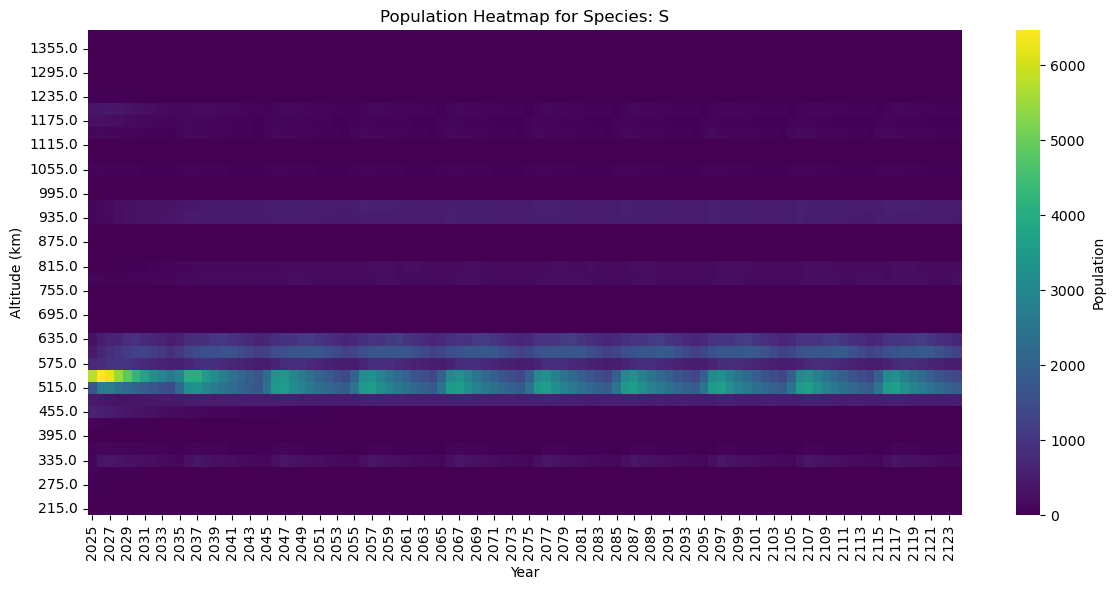

Saved heatmap for S to figures/SEP2/heatmaps/Su_heatmap.png


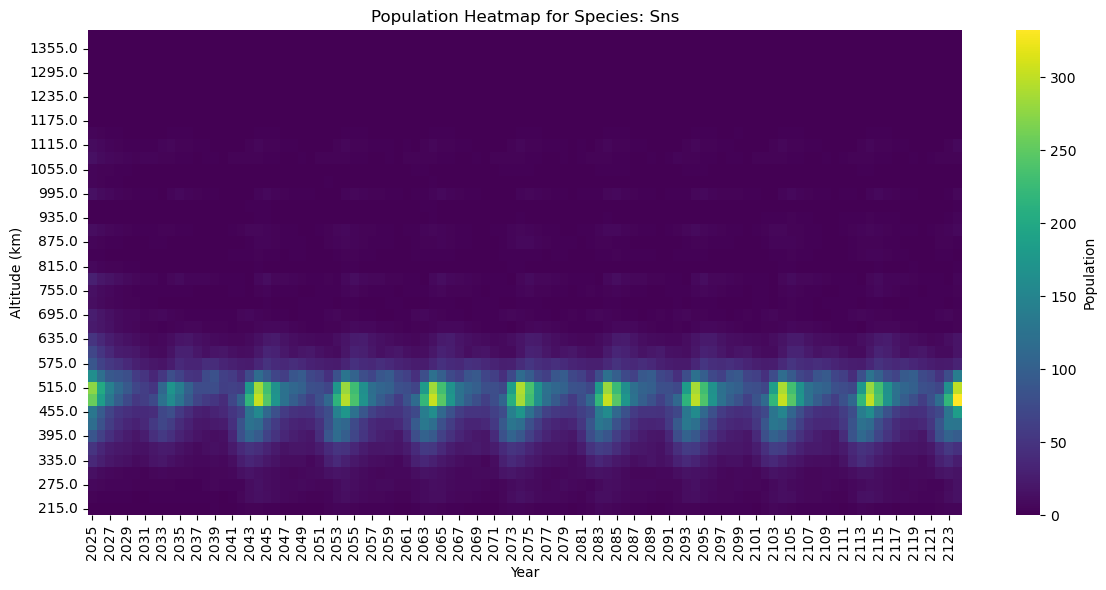

Saved heatmap for Sns to figures/SEP2/heatmaps/Su_heatmap.png


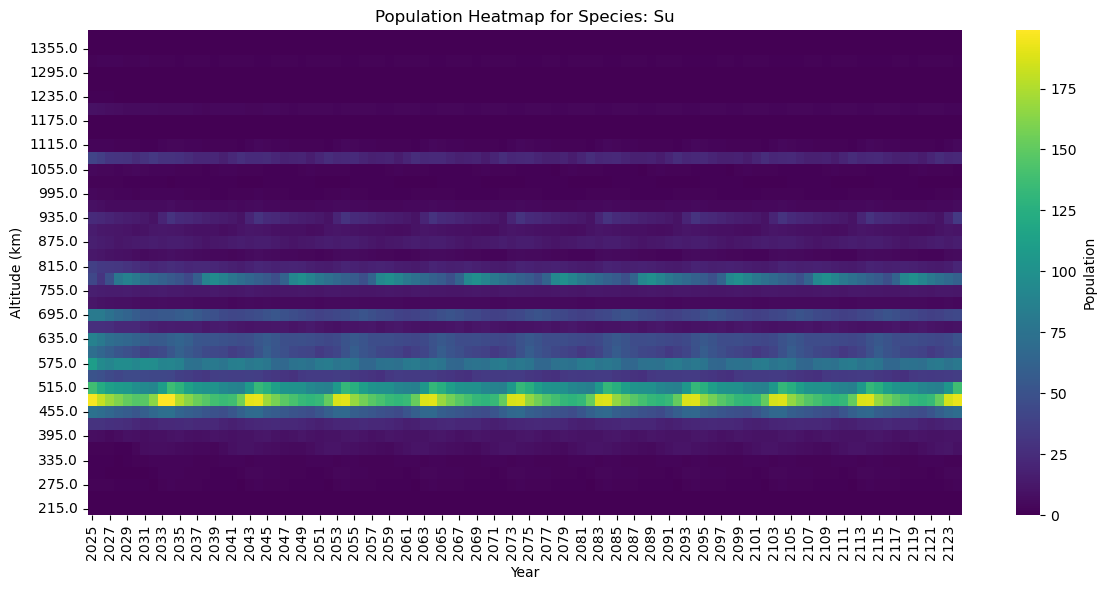

Saved heatmap for Su to figures/SEP2/heatmaps/Su_heatmap.png


In [36]:
# Create shell-resolved population DataFrame
rows_alt = []

Hmid = scenario_properties.HMid  # [n_shells] – altitude midpoints
start_year = pd.to_datetime(scenario_properties.start_date).year
species = scenario_properties.species_names

for i, sp in enumerate(species):
    if (
        sp.startswith('S') or sp.startswith('Su') or sp.startswith('Sns') or
        sp.startswith('N') or sp == 'B'
    ):
        group_label = (
            'Sns' if sp.startswith('Sns') else
            'Su' if sp.startswith('Su') else
            'S' if sp.startswith('S') and not sp.startswith('Su') and not sp.startswith('Sns') else
            'B' if sp == 'B' else
            'D' if sp in large_fragments else
            'N'
        )

        start_idx = i * n_shells
        end_idx = (i + 1) * n_shells
        shell_data = y[start_idx:end_idx, :]  # shape [n_shells, time]

        for shell_idx in range(n_shells):
            altitude = Hmid[shell_idx]
            for t_idx, year_offset in enumerate(times):
                year = int(start_year + year_offset)
                population = shell_data[shell_idx, t_idx]
                rows_alt.append({
                    "Species": group_label,
                    "Population": population,
                    "Year": year,
                    "Altitude": altitude
                })


# Create DataFrame
df_grouped_alt = pd.DataFrame(rows_alt)

print("Columns in df_grouped_alt:", df_grouped_alt.columns.tolist())
print(df_grouped_alt.head())

# Optional: sort for readability
df_grouped_alt = df_grouped_alt.sort_values(["Species", "Year", "Altitude"]).reset_index(drop=True)

# Save to CSV
csv_path_alt = os.path.join(base_path, "pop_time_alt.csv")
df_grouped_alt.to_csv(csv_path_alt, index=False)

print(f"Saved shell-resolved population data to {csv_path_alt}")

import seaborn as sns
import matplotlib.pyplot as plt

# Set up output folder for heatmaps
heatmap_dir = os.path.join(base_path, "heatmaps")
os.makedirs(heatmap_dir, exist_ok=True)

species_list = df_grouped_alt["Species"].unique()

for sp in species_list:
    df_sp = df_grouped_alt[df_grouped_alt["Species"] == sp]

    # Pivot to a matrix: rows=Altitude, columns=Year
    pivot_table = df_sp.pivot_table(
        index="Altitude",
        columns="Year",
        values="Population",
        aggfunc="sum",  # Just in case duplicates exist
        fill_value=0
    )

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap="viridis", cbar_kws={'label': 'Population'}
                )

    plt.gca().invert_yaxis()
    plt.title(f"Population Heatmap for Species: {sp}")
    plt.xlabel("Year")
    plt.ylabel("Altitude (km)")
    plt.tight_layout()

    # Save figure
    # fig_path = os.path.join(heatmap_dir, f"{sp}_heatmap.png")
    # plt.savefig(fig_path, dpi=300)
    # plt.close()
    plt.show()

    print(f"Saved heatmap for {sp} to {fig_path}")

✅ Saved bar chart snapshot to figures/SEP2/pop_snapshot_bar.png


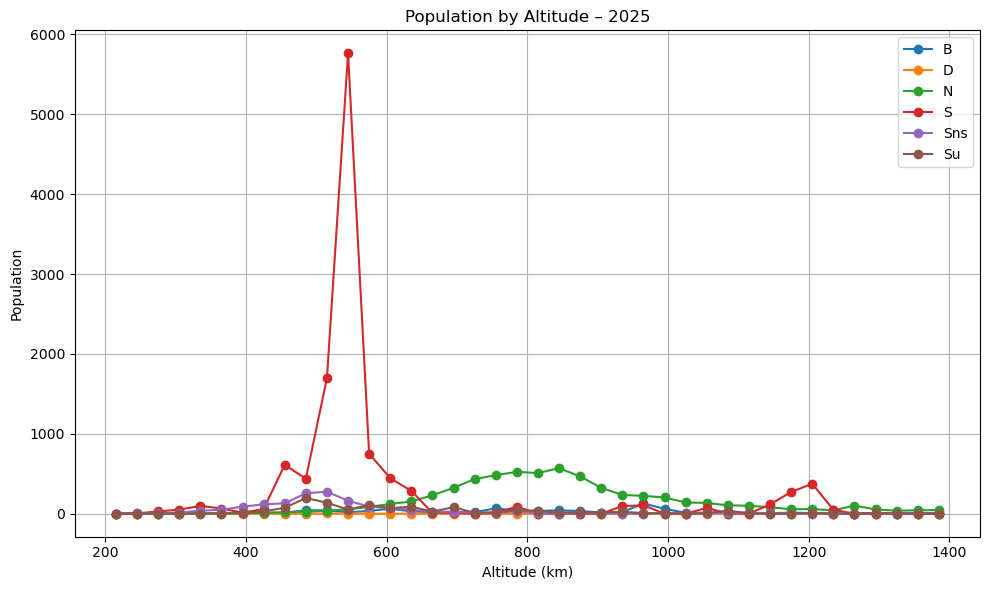

✅ Saved fixed continuous line plot for 2025 to figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2025.png


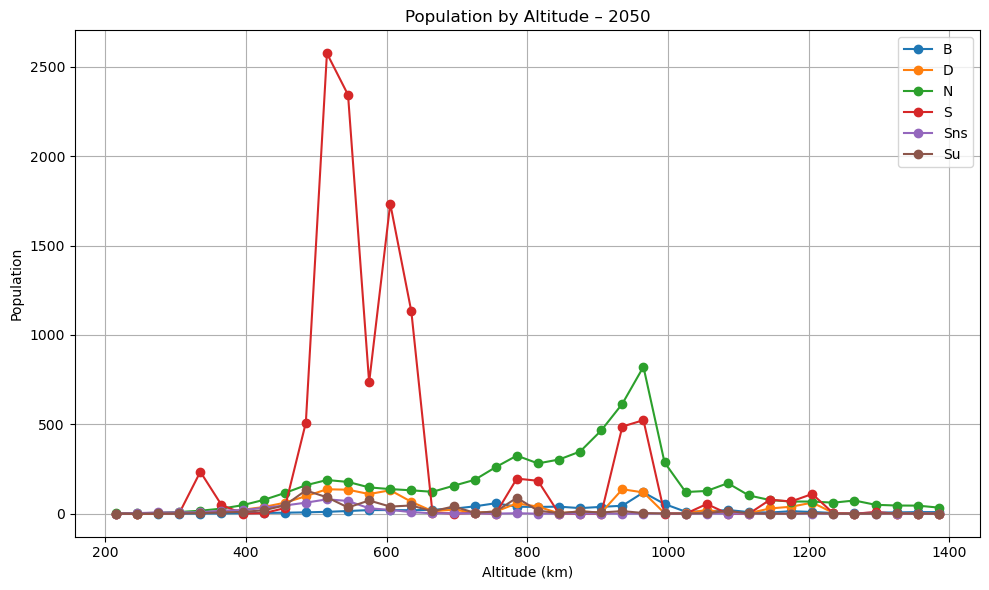

✅ Saved fixed continuous line plot for 2050 to figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2050.png


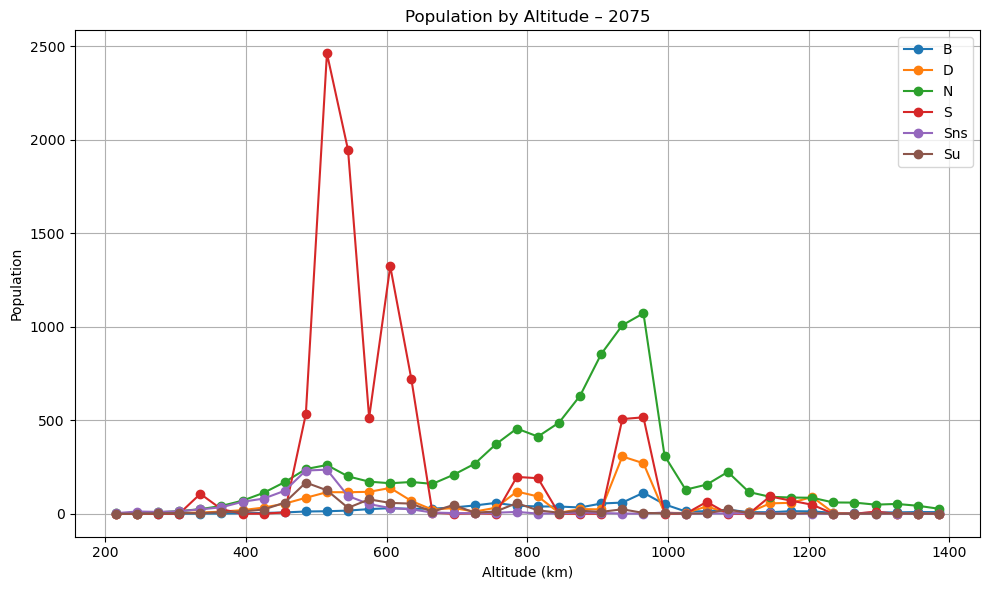

✅ Saved fixed continuous line plot for 2075 to figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2075.png


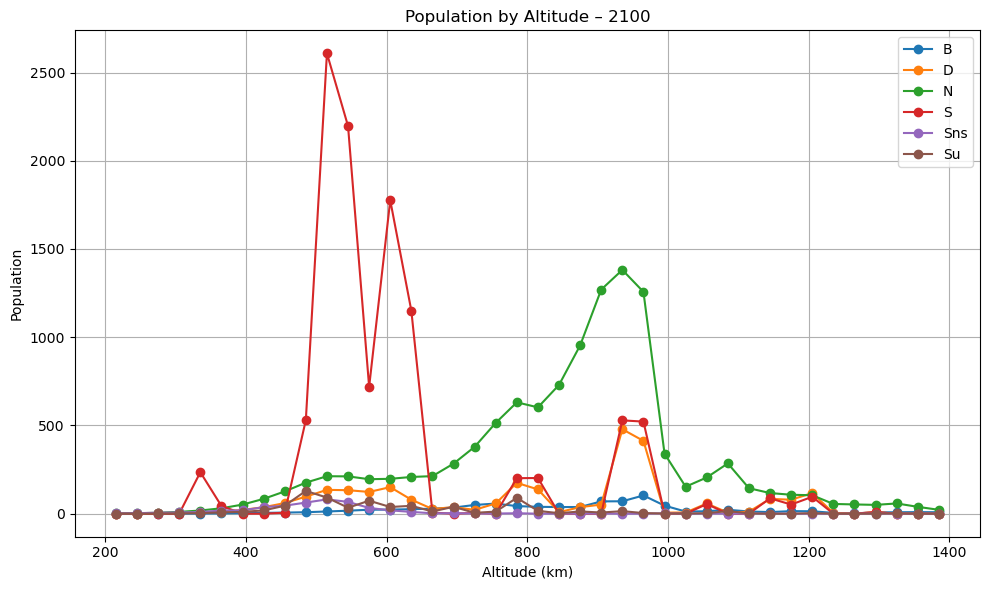

✅ Saved fixed continuous line plot for 2100 to figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2100.png


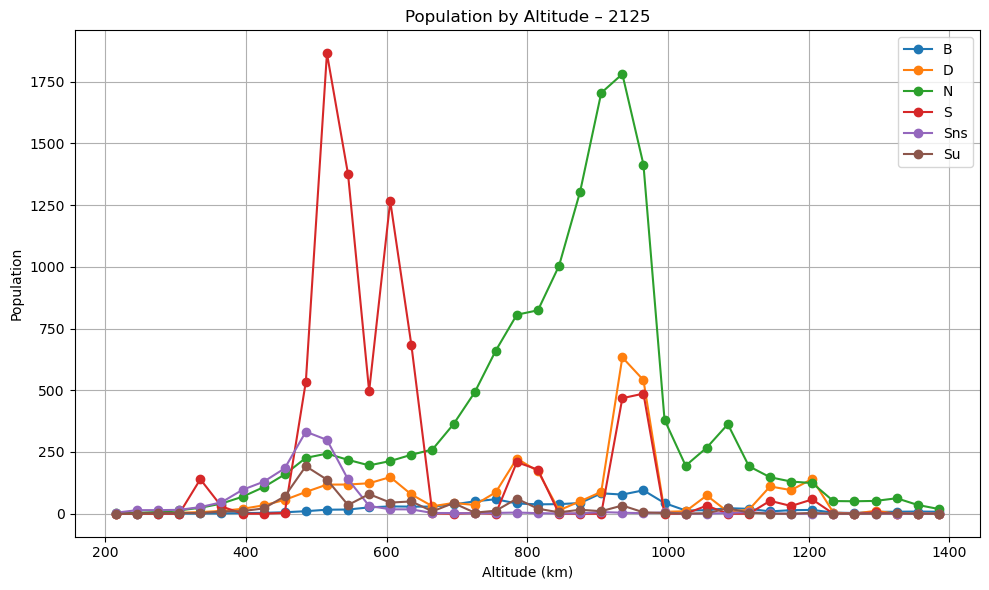

✅ Saved fixed continuous line plot for 2125 to figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2125.png
✅ Saved snapshot data to figures/SEP2/pop_snapshots.csv


In [44]:
snapshot_years = [2025, 2050, 2075, 2100, 2125]
csv_path_alt = os.path.join(base_path, "pop_time_alt.csv")
df_grouped_alt = pd.read_csv(csv_path_alt)
line_plot_dir = os.path.join(base_path, "snapshots_altitude_lines")
os.makedirs(line_plot_dir, exist_ok=True)


# --- FILTER SNAPSHOT YEARS ---
df_snapshots = df_grouped_alt[df_grouped_alt["Year"].isin(snapshot_years)]

# --- 1. BAR CHART: Total Population per Species at Snapshots ---
bar_data = (
    df_snapshots
    .groupby(["Year", "Species"])["Population"]
    .sum()
    .unstack(fill_value=0)
)

bar_data.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Total Population")
plt.title("Snapshot: Total Population per Species")
plt.xticks(rotation=0)
plt.tight_layout()

bar_plot_path = os.path.join(base_path, "pop_snapshot_bar.png")
plt.savefig(bar_plot_path, dpi=300)
plt.close()
print(f"✅ Saved bar chart snapshot to {bar_plot_path}")

# --- 2. LINE PLOTS: Population by Altitude per Year ---
# --- 2. FIXED LINE PLOTS: Continuous Altitude vs Population (scatter+lines) ---

from itertools import product

for year in snapshot_years:
    plt.figure(figsize=(10, 6))
    df_year = df_snapshots[df_snapshots["Year"] == year]

    altitudes = sorted(df_year["Altitude"].unique())
    species_list = sorted(df_year["Species"].unique())

    for species in species_list:
        # Group by altitude first to avoid duplicates
        df_species = (
            df_year[df_year["Species"] == species]
            .groupby("Altitude", as_index=False)["Population"]
            .sum()
        )

        # Reindex to ensure all altitudes are present (fill missing with 0)
        df_species = df_species.set_index("Altitude").reindex(altitudes, fill_value=0).reset_index()

        # Plot
        plt.plot(
            df_species["Altitude"],
            df_species["Population"],
            label=species,
            marker='o',
            linestyle='-'
        )

    plt.title(f"Population by Altitude – {year}")
    plt.xlabel("Altitude (km)")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    line_path = os.path.join(line_plot_dir, f"pop_by_altitude_{year}.png")
    plt.savefig(line_path, dpi=300)
    plt.show()

    print(f"✅ Saved fixed continuous line plot for {year} to {line_path}")

# --- 3. SAVE SNAPSHOT DATA ---
csv_snap_path = os.path.join(base_path, "pop_snapshots.csv")
df_snapshots.to_csv(csv_snap_path, index=False)
print(f"✅ Saved snapshot data to {csv_snap_path}")


In [45]:
scenario_properties.indicator_results

{'indicators': {}}